In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
df_city_day=pd.read_csv("city_day.csv")

### VERİ SETİNİ İNCELEME
- Boyutunu , veri tiplerini ,boş değer oranı , her sütun için istatistik bilgiler

In [52]:
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [53]:
df_city_day.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [54]:
df_city_day.shape

(29531, 16)

In [55]:
df_city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [56]:
df_city_day.describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [57]:
# Bu fonksiyon parametre olarak bir DataFrame alır ve bu DataFrame içerisinde boş değerlerin sayısını, bu boş değerlerin toplam değerler içindeki yüzdesini gösteren tablo döndürür.
def bos_deger_goster(df):
    mis_val = df.isnull().sum() # DataFrame'deki her sütun için boş değerlerin sayısını hesaplar.
    miss_val_percent= 100 * df.isna().sum()/ len(df) # Her sütundaki boş değerlerin, toplam değerler içindeki yüzdesini hesaplar. Yüzde olarak ifade edebilmemiz için 100 ile çarpıyoruz.
    mis_val_table = pd.concat([mis_val, miss_val_percent], axis=1) # Boş değerlerin sayısını ve yüzdesini yeni bir DataFrame içerisinde birleştirir.
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'}) # Yeni DataFrame içerisindeki sütun isimlerini yeniden adlandırıyoruz.
    return mis_val_table_ren_columns # DataFrame'i döndürür.

bos_deger_goster(df_city_day) # df_city_day içerisindeki boş değerleri ve yüzdesini yukarıda tanımladığımız fonksiyon sayesinde görüyoruz.

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


In [58]:
# 'Date' sütununu datetime formatına dönüştür
df_city_day['Date'] = pd.to_datetime(df_city_day['Date'], format='%Y-%m-%d')
df_city_day = df_city_day.sort_values(by = 'Date')

In [59]:
df_city_day["Date"] = pd.to_datetime(df_city_day['Date']) # Date sütununda yer alan değerlerin tipini datetime olarak dönüştürür.

In [60]:
df_city_day['Date'].min() , df_city_day['Date'].max() # Date sütununda yer alan değerlerin en düşük ve en yüksek değerlerini gösterir.

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

In [61]:
df_city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [62]:
df_city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory


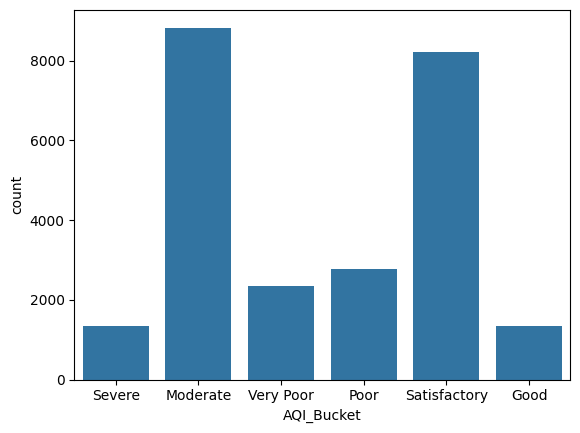

In [63]:
sns.countplot(x=df_city_day["AQI_Bucket"]); # df_full'de AQI_Bucket sütunundaki her bir kategorinin histogram grafiğini çizdik.

Veri seti içinden AQI_Bucketi siliyoruz çünkü hava kalitesini etkileyen bir özellik değil. 

In [65]:
df_city_day = df_city_day.drop(["AQI_Bucket"], axis=1)

In [66]:
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN


<Axes: >

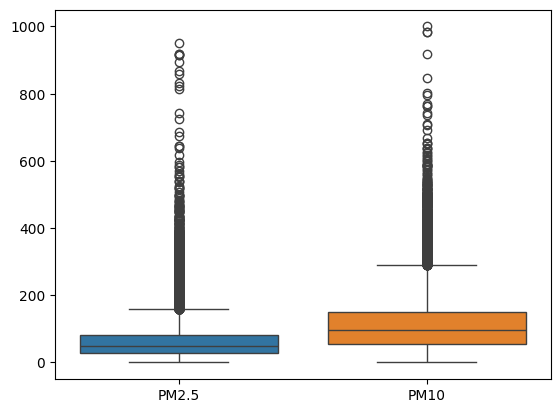

In [67]:
sns.boxplot(data=df_city_day[[ 'PM2.5', 'PM10']]) # PM2.5 ve PM10 sütunlarındaki veriler için bir box plot oluşturduk.

<Axes: >

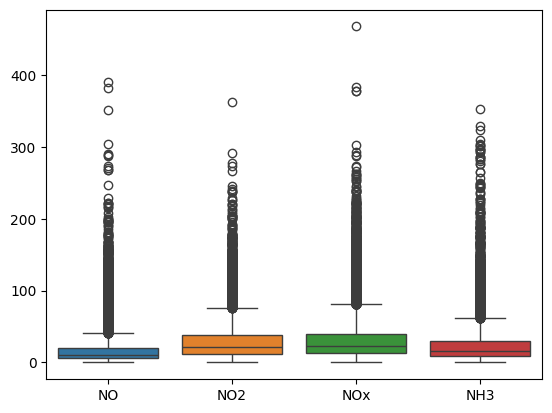

In [68]:
sns.boxplot(data=df_city_day[[ 'NO', 'NO2', 'NOx','NH3']]) # NO, NO2, NOx ve NH3 sütunlarındaki veriler için bir box plot oluşturduk.

<Axes: >

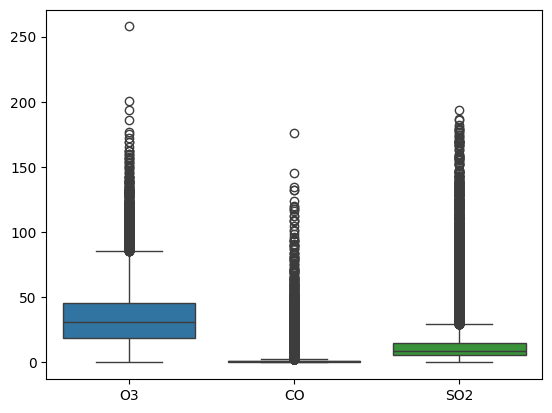

In [69]:
sns.boxplot(data=df_city_day[[ 'O3', 'CO', 'SO2']]) # O3, CO ve SO2 sütunlarındaki veriler için bir box plot oluşturduk.

<Axes: >

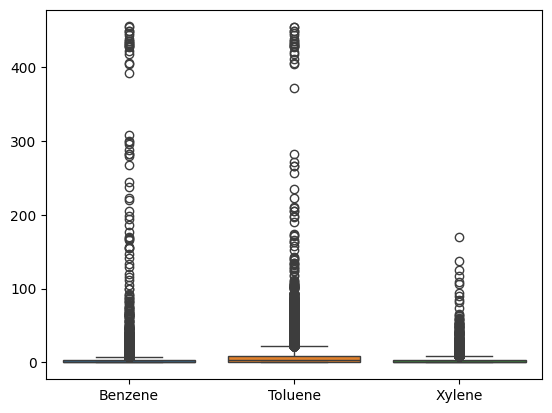

In [70]:
sns.boxplot(data=df_city_day[[ 'Benzene', 'Toluene', 'Xylene']]) # Benzene, Toluene ve Xylene sütunlarındaki veriler için bir box plot oluşturduk.

## VERİYİ DÜZENLEME İŞLEMLERİ
- Aykırı veriler , eksik veriler ,hedef sütunumuz ile ilişkisi az olan veriler ile ilgili işlemler

In [72]:
# Bu fonksiyon parametre olarak bir DataFrame alır ve DataFrame'deki sayısal sütunlar için aykırı değerleri belirler. Bu aykırı değerler ilgili çeyrek değerlerle (Q1 veya Q3) değiştirir. Aykırı değerler, çeyrekler arası aralık (IQR) kullanılarak tanımlanır.
def replace_outliers_with_quartiles(df):
    
    for column in df_city_day.select_dtypes(include=['number']).columns: # DataFrame'de yer alan tüm sayısal sütunlar üzerinde gezmek için kullanılır.
        # Her sütun için birinci çeyrek (Q1) ve üçüncü çeyrek (Q3) değerlerini hesaplar ve çeyrekler arası aralığı (IQR) hesaplar.
        Q1 = df_city_day[column].quantile(0.25)
        Q3 = df_city_day[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Aykırı değerleri belirlemek için alt sınır ve üst sınır hesaplanıyor ve bu sınırların dışındaki değerleri aykırı değer olarak kabul ediyoruz.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Her sütun için, aykırı değerleri belirleyip ve bu değerlerin Q1 veya Q3 ile değiştirilirmesini sağlıyoruz. Bu işlemi bir lambda fonksiyonu kullanarak yapıyoruz. Eğer değer alt sınırdan küçükse, Q1 ile değiştirilir. Eğer üst sınırdan büyükse, Q3 ile değiştirilir. En son durumda değer değiştirilmez aynı kalır.
        df_city_day[column] = df_city_day[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df_city_day # Aykırı değerler değiştirilmiş şekilde DataFrame döner

df_city_day = replace_outliers_with_quartiles(df_city_day)

In [73]:
df_city_day.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24933.0,54.975923,0.04,28.82,48.57,80.59,158.21,32.781561
PM10,18391.0,104.818086,0.01,56.255,95.68,149.7425,289.95,60.357602
NO,25949.0,12.472491,0.02,5.63,9.89,19.95,41.43,8.941774
NO2,25946.0,25.482607,0.01,11.75,21.69,37.62,76.4,16.698364
NOx,25346.0,26.520383,0.0,12.82,23.52,40.125625,81.06,17.876378
NH3,19203.0,19.661227,0.01,8.58,15.85,30.02,62.16,13.838362
CO,27472.0,0.952485,0.0,0.51,0.89,1.45,2.86,0.61346
SO2,25677.0,10.304869,0.01,5.67,9.16,15.22,29.54,5.908036
O3,25509.0,32.836577,0.01,18.86,30.84,45.57,85.63,17.969539


<Axes: >

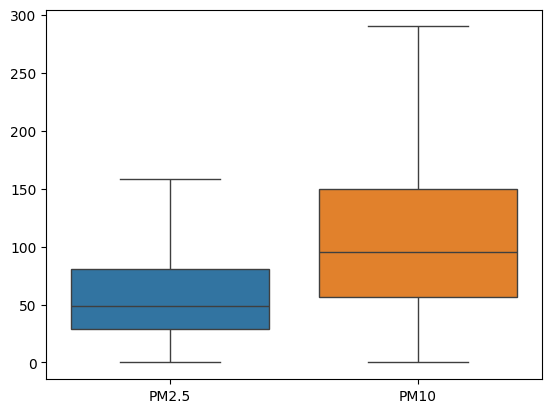

In [74]:
sns.boxplot(data=df_city_day[[ 'PM2.5', 'PM10']]) # Güncel DataFrame için sütunlarındaki veriler için bir box plot daha oluşturduk.

<Axes: >

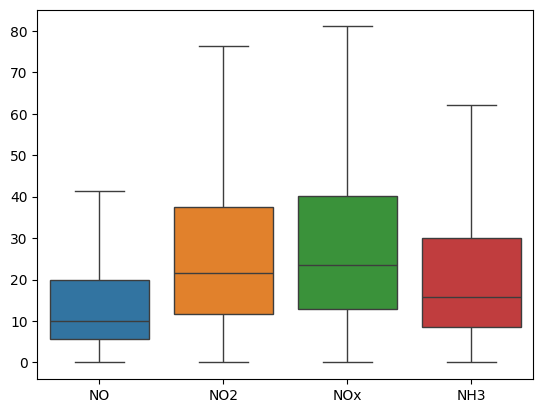

In [75]:
sns.boxplot(data=df_city_day[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

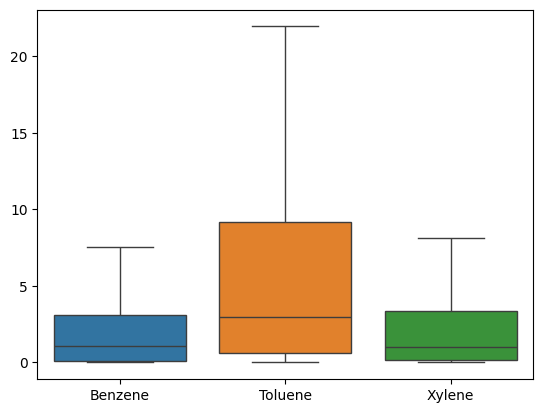

In [76]:
sns.boxplot(data=df_city_day[[ 'Benzene', 'Toluene', 'Xylene']])

In [77]:
df=df_city_day.drop(columns=['City']) # Korelasyon kategorik sütunlarla çalışmadıgı için City ve AQI_Bucket sütünlarını siliyoruz  ve bunu df adında başka bir DataFrame aktarıyoruz.

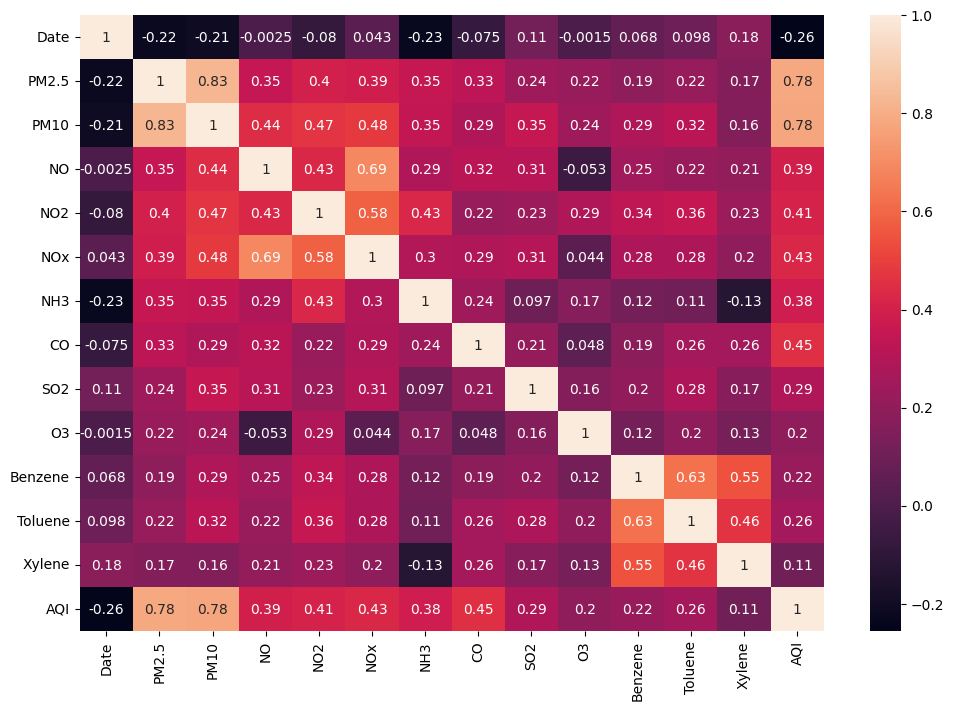

In [78]:
# df DataFrame'indeki sütunlar arasındaki korelasyonları görselleştirmek için bir ısı haritası oluşturuyoruz.
plt.figure(figsize=(12, 8)) # Grafiğin boyutunu belirledik.
sns.heatmap(df.corr(),annot=True) # Sütunlar arası korelasyonları görselleştirdik, annot=True parametresi her bir korelasyon değerini görmemizi sağlıyor.
plt.show() # Grafiği ekranda gösterir.

AQI değerini etkileyen en önemli değişkenler başlıca PM2.5, PM10, CO ve NOx olarak gözüküyor.

In [80]:
# 0.25 üzerinde olan verilere göre tahmin yapıcaz

In [81]:
df_city_day=df_city_day.drop(columns=['Xylene', 'Benzene','O3']) # df_city_day'den Xylene, Benzene, O3 sütunlarını kaldırıyoruz.

In [82]:
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.1500,NaN,0.92,27.64,0.02,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.6800,4.59,1.17,9.20,NaN,NaN
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.5700,NaN,1.45,15.22,3.93,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.3800,NaN,0.00,NaN,0.00,NaN


In [83]:
#HEDEF DEĞİŞKENİMİZ AQI SÜTUNUNDA BOŞ DEĞERLER VAR , HEDEF SÜTUNUMUZ BOŞ OLAMAZ BU NEDENLE AQI DOLU OLANLARDAN YENİ VERİSETİ OLUŞTURDUK.

In [84]:
df_full=df_city_day[df_city_day['AQI'].notna()]

In [85]:
df_full['Year'] = df_full['Date'].dt.year

In [86]:
df_full.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015
10231,Delhi,2015-01-03,87.18,131.900,25.73,30.31,47.9500,30.02,1.45,2.65,10.23,143.0,2015
10232,Delhi,2015-01-04,151.84,241.840,25.01,36.91,48.6200,30.02,1.45,4.63,9.71,319.0,2015
10233,Delhi,2015-01-05,146.60,219.130,14.01,34.92,38.2500,30.02,1.45,3.33,6.21,325.0,2015


In [87]:
bos_deger_goster(df_full) 

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,678,2.728370
PM10,7086,28.515091
NO,387,1.557344
NO2,391,1.573441
NOx,1857,7.472837
NH3,6536,26.301811
CO,445,1.790744
SO2,605,2.434608


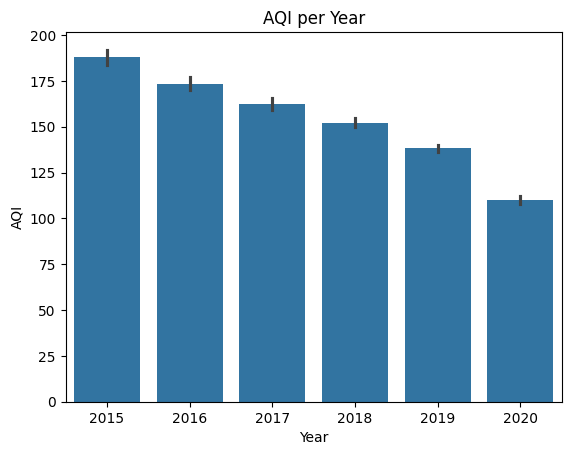

In [88]:
# Yıllara göre AQI değerlerini gösteren histogram
plt.title('AQI per Year')
sns.barplot(x='Year',y='AQI',data=df_full); 

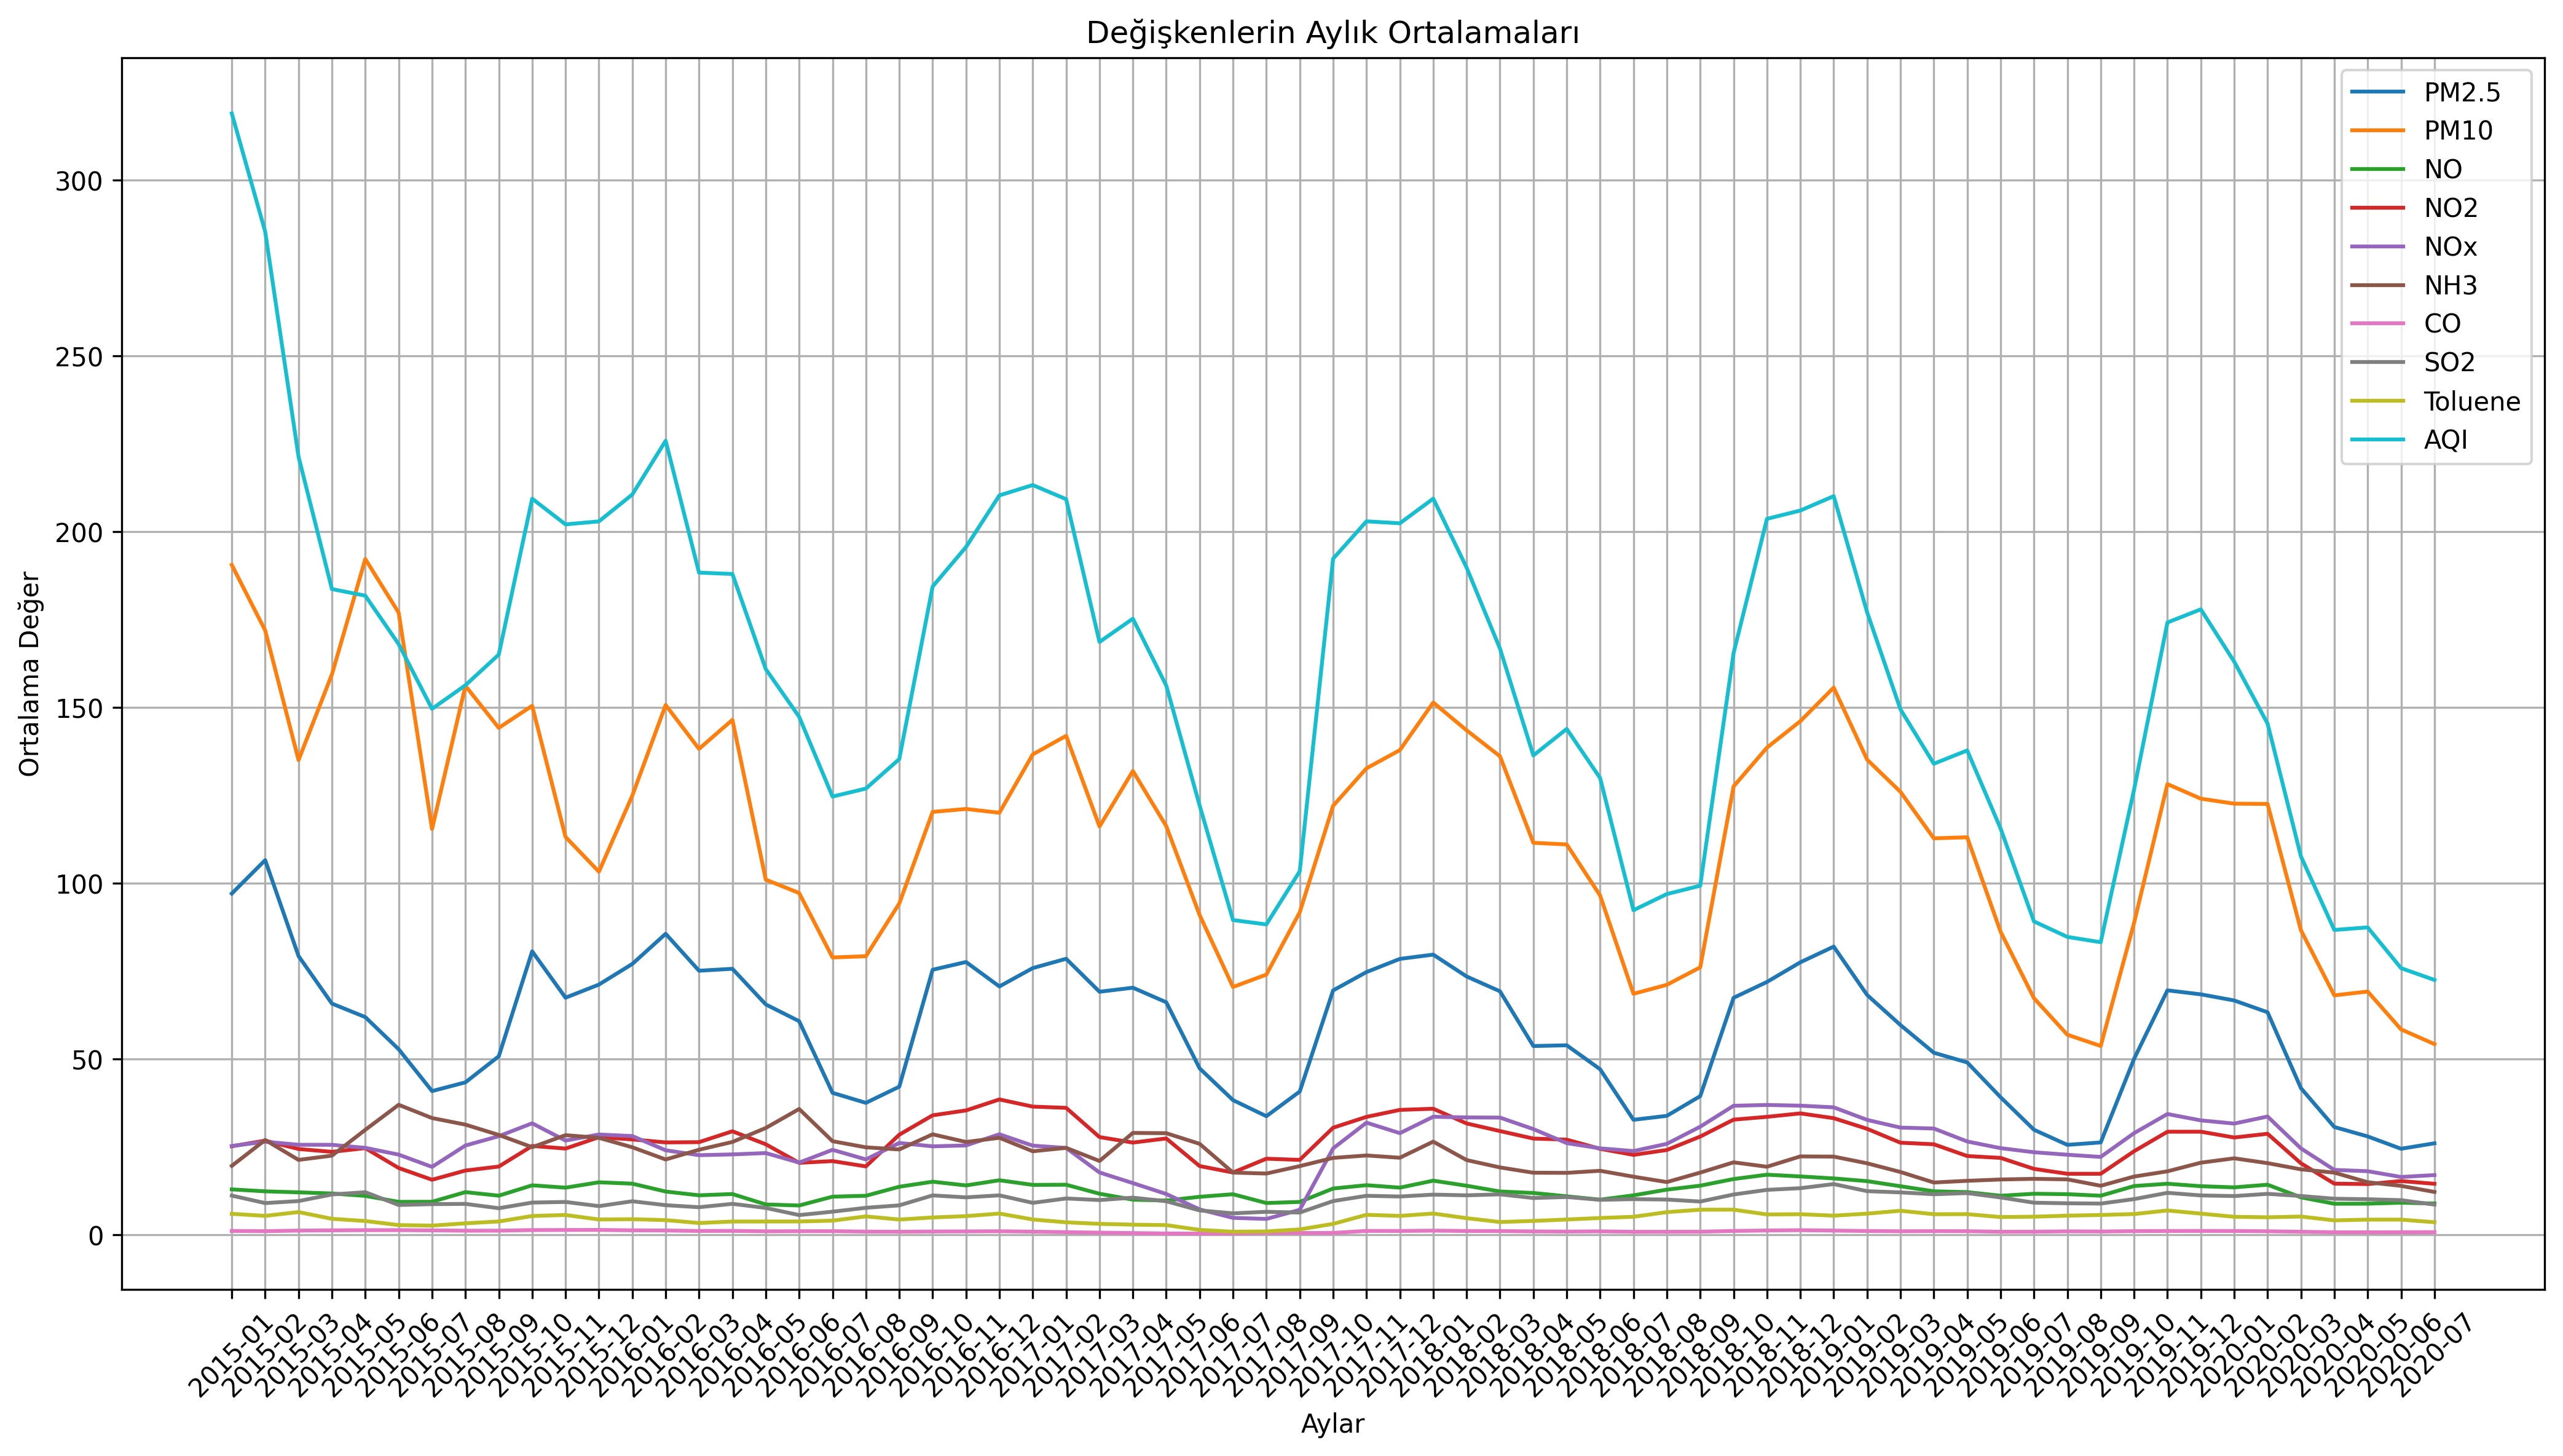

In [89]:
numerical_cols = df_city_day.select_dtypes(include='number').columns.tolist()
df_city_day['Month'] = df_city_day['Date'].dt.to_period('M')
monthly_data = df_city_day.groupby('Month')[numerical_cols].mean(numeric_only=True)

plt.figure(figsize=(14, 8), dpi=300)
for col in numerical_cols:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Aylar')
plt.ylabel('Ortalama Değer')
plt.title('Değişkenlerin Aylık Ortalamaları')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Ay etiketlerini daha okunabilir hale getirmek için döndür
plt.tight_layout()  # Grafik elemanlarının sıkışmasını önler
plt.show()

Yukarıdaki çizgi grafiği; AQI, PM10, PM2.5, NO, NO2 gibi sayısal değerlerin aylık ortalamalarını gösteren bir grafiktir. Burada görünen dalgalanmalara göre değerlerin belirli mevsimselliğe göre değiştiği söylenebilir.

Hindistan'ın mevsim aralıklarına bakıldığında Aralık ve Ocak aylarının kış mevsimine denk geldiği görülmektedir. Kış aylarında kömür, ahşap gibi ısınma araçları ve taşıtlar için yakıt kullanımının artması sonucu AQI değerinin arttığı söylenebilir.

Haziran ve Temmuz aylarının ise Muson dönemine denk gelmesi, yağışların ve rüzgarların artmasına bağlı olarak havanın dağılıp temizlenmesine fırsat sağlar. Bu sebeple de AQI değerinin düşüp hava kalitesinin artmasına olanak sağladığı söylenebilir.

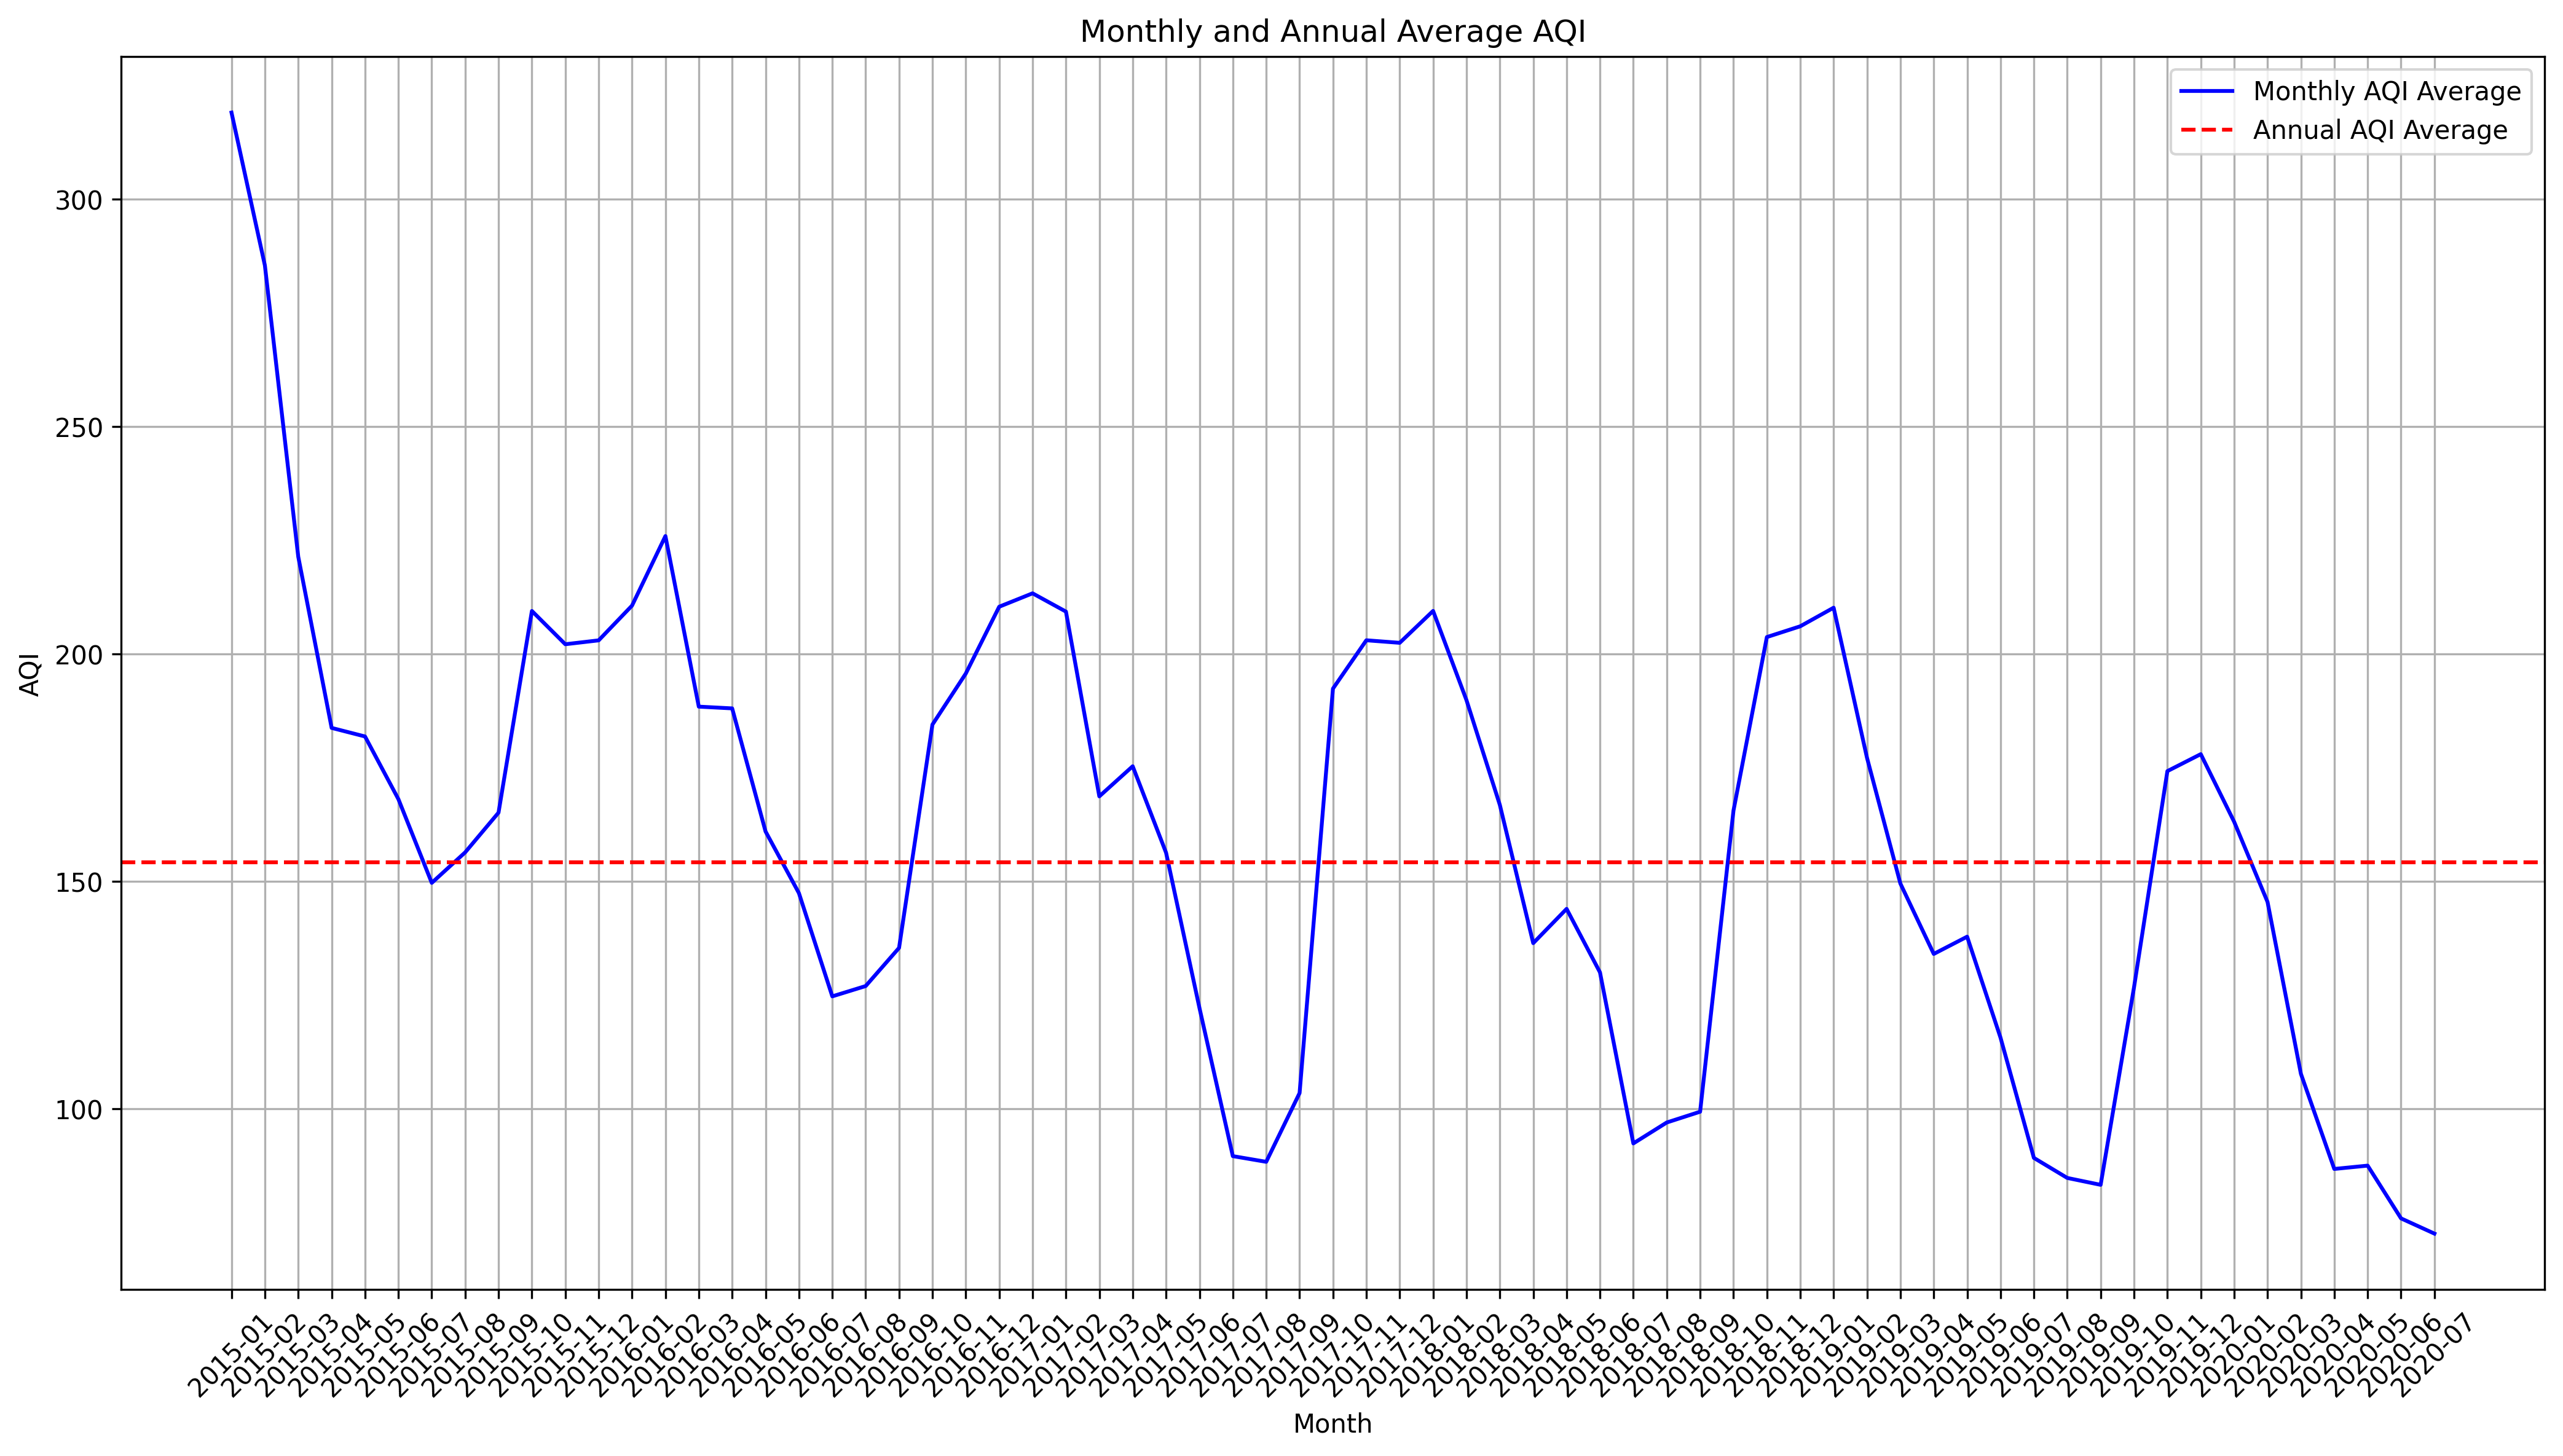

In [91]:
df_city_day['Month'] = df_city_day['Date'].dt.to_period('M')
df_city_day['Year'] = df_city_day['Date'].dt.year

monthly_aqi = df_city_day.groupby('Month')['AQI'].mean()

annual_aqi_mean = df_city_day.groupby('Year')['AQI'].mean()

plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, label='Monthly AQI Average', color='blue')

plt.axhline(y=annual_aqi_mean.mean(), color='red', linestyle='--', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Buradaki grafik ise AQI değerinin aylık ortalamalarını gösteren çizgi grafiğidir. Grafik incelendiğinde Aralık-Ocak aylarında AQI değerinin üst seviyeye ulaşıp Haziran-Temmuz aylarında en düşük seviyeye ulaşmaktadır. Bu grafikten de mevsimselliğin etkili olduğu görülebilir.

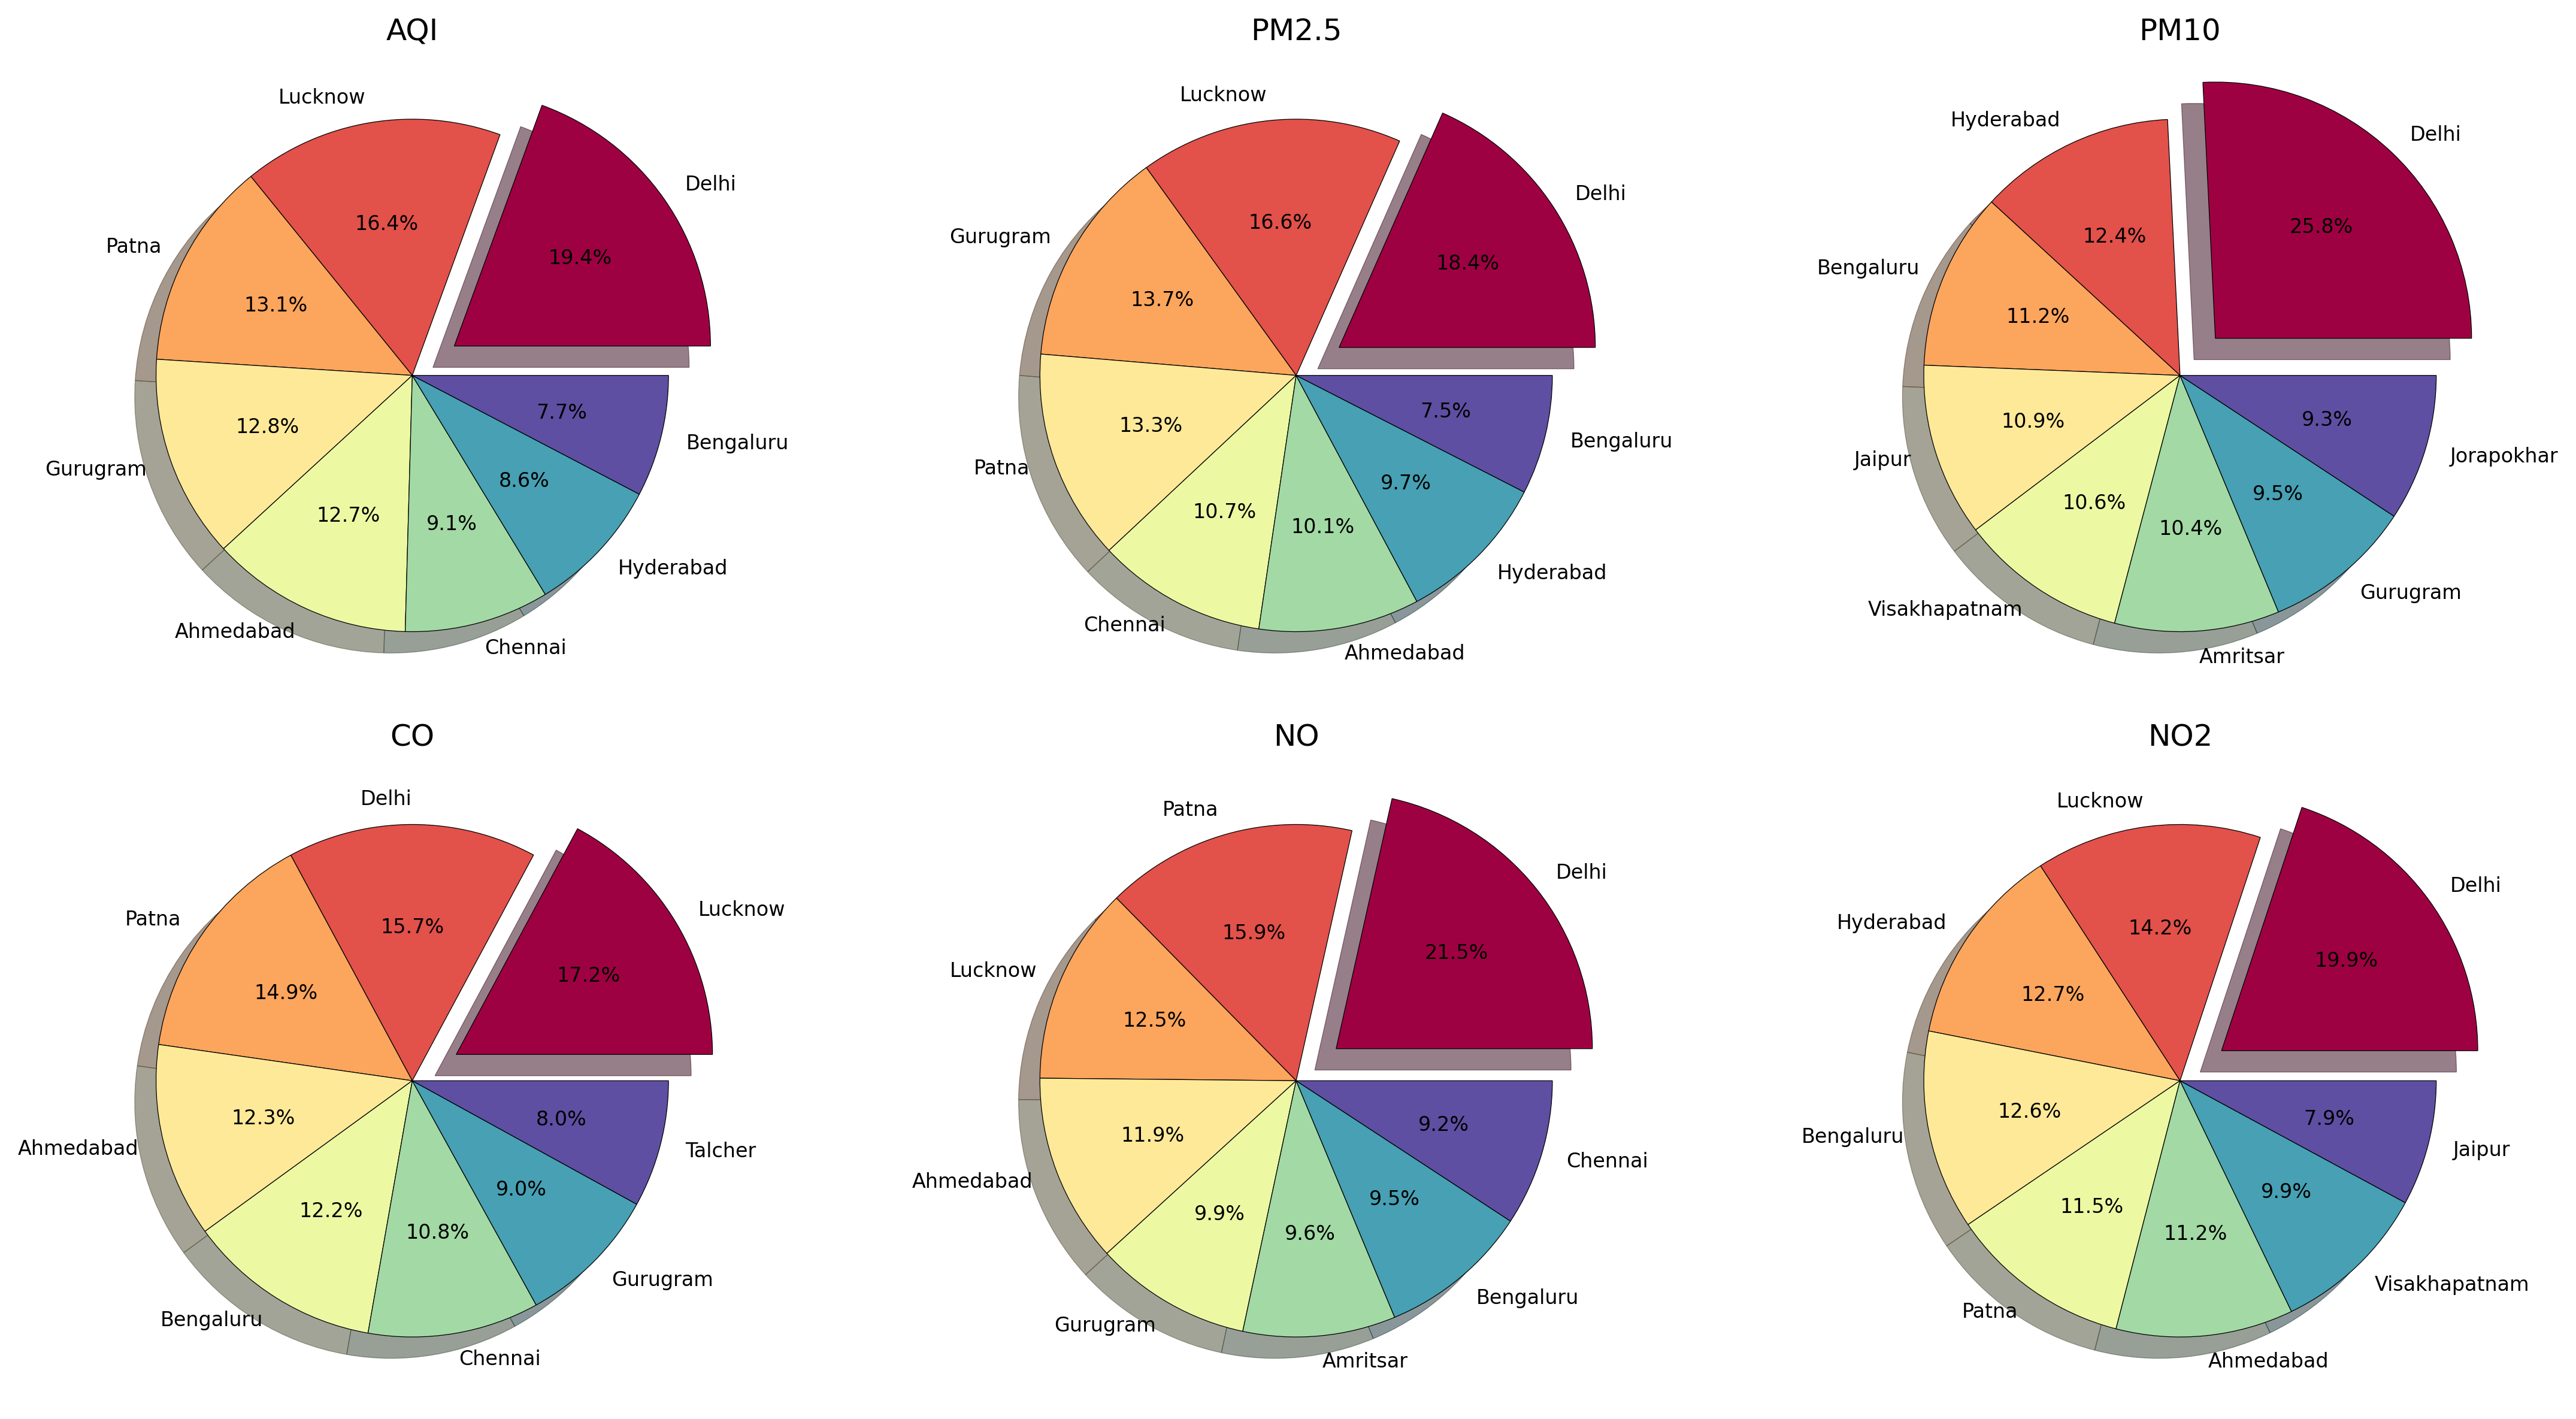

In [93]:
cols = ['AQI', 'PM2.5', 'PM10', 'CO', 'NO', 'NO2']

cmap = plt.get_cmap('Spectral')
color = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0.2, 0, 0, 0, 0, 0, 0, 0]

# Alt grafiklerin sayısını ve figür boyutunu ayarla
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), dpi=300)

# Alt grafikleri bir listeye dönüştür, böylece döngüde kolayca erişebilirsiniz
axes = axes.flatten()

for ax, col in zip(axes, cols):
    # Şehirleri gruplandırıp en yüksek toplamı olan 8 şehri seç
    x = df_city_day.groupby('City')[col].sum().sort_values(ascending=False)
    x = x.reset_index('City')
    
    # 8 şehir ve değerleri
    top_cities = x[:8]
    sizes = top_cities[col].values  # Pasta dilimlerinin boyutları
    labels = top_cities['City'].tolist()  # Şehir isimlerini etiket olarak al
    
    # Pasta grafiği oluştur
    wedges, texts, autotexts = ax.pie(sizes, shadow=True, autopct='%1.1f%%', 
                                      colors=color, explode=explode,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
                                      labels=labels)

    # Etiket yazı boyutlarını küçült
    for text in texts:
        text.set_fontsize(8)  # Etiket yazı boyutunu küçült
    
    # Yüzde etiket yazı boyutlarını küçült
    for autotext in autotexts:
        autotext.set_fontsize(8)  # Yüzde etiket yazı boyutunu küçült
    
    ax.set_title(f'{col}')  # Her bir grafiğe başlık ekle

# Eğer subplotlar fazla ise, fazla olanları kapat
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Yukarıdaki pasta grafiklerinde hava kirliliği yüksek olan ilk sekiz şehir ve AQI değeriyle birlikte AQI değerini en çok etkileyen bağımsız değişkenlerin şehirlere göre dağılımı ayrı ayrı gösterilmiştir. Grafiğe genel bir bakış yapıldığında neredeyse bütün grafiklerde en yüksek kirliliğinin Delhi şehrine ait olduğu görülmektedir. Diğer dağılımların da birbirlerine benzer durumda olduğu görülmesiyle değişkenlerin AQI değerini doğrusal olarak etkilediği söylenebilir.

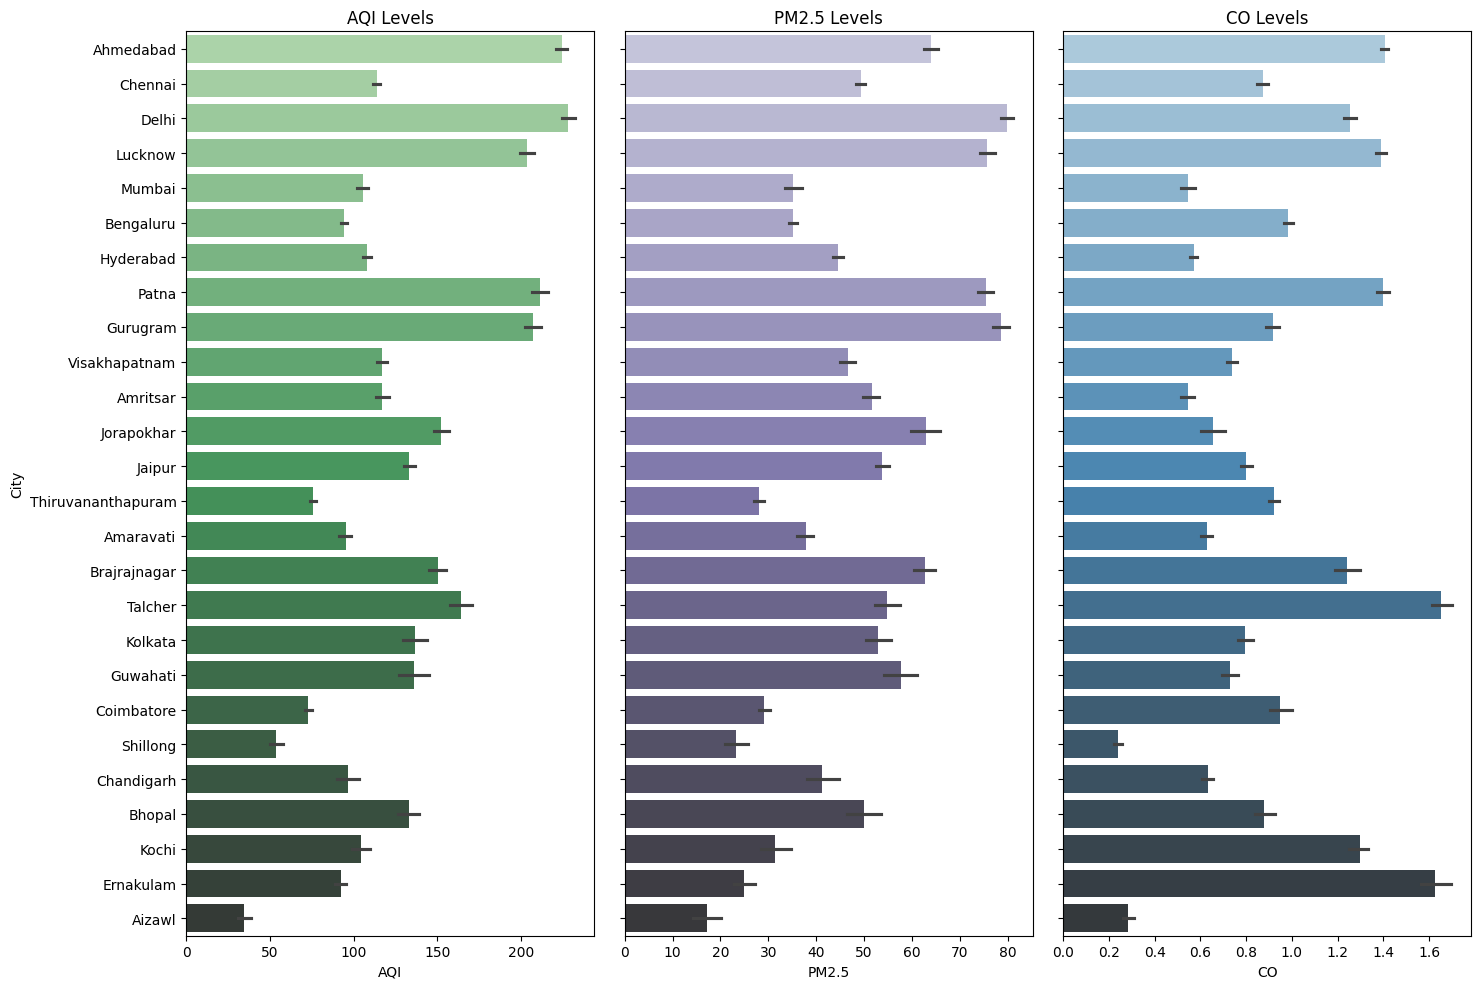

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.barplot(ax=axes[0], y='City', x='AQI', data=df_city_day, palette='Greens_d')
axes[0].set_title('AQI Levels')

sns.barplot(ax=axes[1], y='City', x='PM2.5', data=df_city_day, palette='Purples_d')
axes[1].set_title('PM2.5 Levels')

sns.barplot(ax=axes[2], y='City', x='CO', data=df_city_day, palette='Blues_d')
axes[2].set_title('CO Levels')

plt.tight_layout()
plt.show()

Buradaki çizgi grafiklerinde verideki şehirlerin AQI ve AQI değerini etkileyen en çok 2 değer olan PM2.5, CO değişkenlerinin değerini görülmektedir. Genel olarak PM2.5 ve CO'ya göre AQI çubuğunun uzunluğu artmaktadır. Bazı şehirlerin CO değeri daha düşük olmasına rağmen PM2.5 değerinin daha yüksek olması AQI değerinin artmasına neden olmuştur. Buradan PM2.5 değerinin CO üzerindeki üstünlüğü görülebilir.

### VERİYİ HAZIRLAMA
- Veri setinin numerik ve kategorik kolonlarını belirleme , boş değerleri scaler ile doldurma , kategorik verilere onehotencoding yapma , veri setini eğitim ,test ve doğrulama veri setleri olarak ayırma , ayırdıgımız veri setlerinin input ve hedef kolonlarını belirleme

In [98]:
numeric_cols = df_full.select_dtypes(include=np.number).columns.tolist() # df_city_day'deki sayısal sütunların isimlerini bir liste olarak numeric_cols'a atadık.
numeric_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'Year']

In [99]:
categorical_cols = df_full.select_dtypes(include=['object']).columns.tolist() # df_city_day'deki kategorik sütunların isimlerini bir liste olarak categorical_cols'a atadık.
categorical_cols

['City']

In [100]:
full_columns=df_full.columns
full_columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI', 'Year'],
      dtype='object')

In [101]:
input_cols = [full_columns[0]]+list(full_columns[2:-2])+ [full_columns[-1]]  # full_columns'dan 0. index ve 2'den itibaren son sütun hariç olacak şekilde input_cols'a atadık.
target_col = 'AQI' # Hedef sütunu AQI olarak belirledik.

In [102]:
input_cols

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'Year']

In [103]:
from sklearn.model_selection import train_test_split
train_and_val_df, test_df = train_test_split(df_full, test_size=0.2, random_state=42) # Veri setinin %20'lik kısmını test seti olarak ayırdık.
train_df, val_df = train_test_split(df_full, test_size=0.2) # Veri setinin kalan %80'lik kısmını eğitim ve doğrulama seti olarak ayırdık.
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (19880, 13)
val_df.shape : (4970, 13)
test_df.shape : (4970, 13)


In [104]:
train_df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
6261,Bengaluru,2020-05-21,19.53,60.44,4.38,14.59,16.17,8.87,0.74,5.80,1.81,70.0,2020
12731,Gurugram,2016-10-23,56.33,NaN,4.27,13.49,5.98,NaN,0.50,2.83,NaN,91.0,2016
9517,Chennai,2019-08-11,16.68,30.27,5.21,13.39,18.57,15.17,0.57,5.95,0.68,76.0,2019
15681,Hyderabad,2018-01-08,72.66,141.46,7.08,51.85,33.01,19.80,0.98,9.28,12.46,146.0,2018
17652,Jaipur,2020-05-14,35.15,67.10,3.54,15.29,16.70,19.43,0.62,11.74,0.56,124.0,2020


In [105]:
val_df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
21135,Lucknow,2018-07-13,27.48,NaN,11.78,27.20,23.0200,21.18,0.87,6.54,0.08,90.0,2018
1029,Ahmedabad,2017-10-26,112.25,NaN,19.95,36.61,40.1275,NaN,1.45,15.22,9.15,208.0,2017
2608,Amaravati,2019-03-25,17.03,46.960,2.89,10.15,7.8200,5.53,0.50,13.84,3.77,45.0,2019
11041,Delhi,2017-03-23,151.17,149.745,19.95,70.55,29.1700,30.02,0.55,27.21,5.55,208.0,2017
27355,Thiruvananthapuram,2018-07-19,13.54,35.930,2.98,9.67,7.4200,1.79,0.81,6.38,NaN,52.0,2018


In [106]:
test_df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
11286,Delhi,2017-11-23,80.59,251.23,34.73,55.04,70.15,40.03,1.55,18.32,11.97,340.0,2017
27868,Thiruvananthapuram,2019-12-14,17.89,42.06,8.57,14.27,14.52,9.53,1.30,8.33,NaN,78.0,2019
28109,Visakhapatnam,2016-08-10,23.77,96.36,18.46,33.73,30.20,13.62,1.09,15.22,9.36,101.0,2016
26662,Talcher,2019-09-11,30.58,83.52,40.31,6.79,41.69,8.29,1.24,15.22,NaN,76.0,2019
3109,Amritsar,2017-04-04,40.64,63.97,8.88,27.46,NaN,16.51,0.00,2.64,NaN,76.0,2017


In [107]:
train_inputs = train_df[input_cols].copy() # train_df DataFrame'inden input_cols sütunlarını kopyalayıp train_inputs'a atadık
train_target = train_df[target_col].copy() # train_df DataFrame'inden target_col sütunlarını kopyalayıp train_target'a atadık
val_inputs = val_df[input_cols].copy() # val_df DataFrame'inden input_cols sütunlarını kopyalayıp val_inputs'a atadık
val_target = val_df[target_col].copy() # val_df DataFrame'inden target_col sütunlarını kopyalayıp val_target'a atadık
test_inputs = test_df[input_cols].copy() # test_df DataFrame'inden input_cols sütunlarını kopyalayıp test_inputs'a atadık
test_target = test_df[target_col].copy() # test_df DataFrame'inden target_col sütunlarını kopyalayıp test_target'a atadık

In [108]:
train_inputs.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year
6261,Bengaluru,19.53,60.44,4.38,14.59,16.17,8.87,0.74,5.80,1.81,2020
12731,Gurugram,56.33,NaN,4.27,13.49,5.98,NaN,0.50,2.83,NaN,2016
9517,Chennai,16.68,30.27,5.21,13.39,18.57,15.17,0.57,5.95,0.68,2019
15681,Hyderabad,72.66,141.46,7.08,51.85,33.01,19.80,0.98,9.28,12.46,2018
17652,Jaipur,35.15,67.10,3.54,15.29,16.70,19.43,0.62,11.74,0.56,2020


In [109]:
train_target

6261      70.0
12731     91.0
9517      76.0
15681    146.0
17652    124.0
         ...  
21553     73.0
18026    124.0
12847    331.0
26427    336.0
14289     41.0
Name: AQI, Length: 19880, dtype: float64

In [110]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist() # include parametresi anlaşılıyor ama araştır ...
categorical_cols = train_inputs.select_dtypes('object').columns.tolist() # sayısal olmayan tüm alanların tipi object gözüküyor. 

In [111]:
from sklearn.impute import SimpleImputer

In [112]:
imputer =  SimpleImputer(strategy = 'mean') # imputer nesnesi oluşturduk ve boş değerleri ortalama ile doldurmasını belirttik.
imputer.fit(df_full[numeric_cols]) # df_full DataFrame'indeki sayısal sütunları kullanarak imputer'ı eğitir ve her sütun için ortalama değerleri hesaplar.

SimpleImputer()

In [113]:
# Eğitim, test ve doğrulama setlerindeki eksik değerler transform metodu fit ile öğrenilmiş ortalama değerleri kullanarak dönüşüm yapar.
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [114]:
train_inputs[numeric_cols].isna().sum() # numeric_cols'da her sütun için toplam boş veri sayısını döndürür.

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
Toluene    0
Year       0
dtype: int64

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler().fit(train_inputs[numeric_cols]) # scaler nesnesi oluşturduk ve eğitim verisi ile fit ettik.
# Eğitim, test ve doğrulama setlerindeki sayısal sütunlar standartlaştırılıyor.
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [117]:
test_inputs.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,4970.0,0.007524,1.003709,-1.707518,-0.784154,-0.151380,0.771596,3.196476
PM10,4970.0,0.001787,1.010651,-2.076210,-0.669409,0.000163,0.372737,3.626529
NO,4970.0,-0.002068,1.007433,-1.407916,-0.754550,-0.300698,0.732479,3.266250
NO2,4970.0,-0.004023,0.997394,-1.551893,-0.835236,-0.192751,0.703934,3.033034
NOx,4970.0,0.000208,1.000815,-1.570561,-0.746781,-0.063717,0.644411,3.182152
NH3,4970.0,0.017275,1.011281,-1.682682,-0.737550,0.002038,0.441751,3.560816
CO,4970.0,0.006851,1.007197,-1.750906,-0.700936,-0.095352,0.775993,3.233184
SO2,4970.0,-0.015151,1.003109,-1.776455,-0.791969,-0.197140,0.792518,3.309767
Toluene,4970.0,-0.009067,1.007111,-1.195554,-0.835481,-0.002303,0.455162,3.836291
Year,4970.0,-0.010622,0.996627,-2.073277,-0.728302,-0.055815,0.616672,1.289159


In [118]:
df_full[categorical_cols].nunique() # df_full'da kategorik sütunlardaki uniqe (benzersiz) değerlerin sayısını döndürür.

City    26
dtype: int64

In [119]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore') # encoder nesnesi oluşturduk. Varsayılan olarak sparse_output=True olur ve sonuçlar sıkışık (sparse) formatta döner. False seçilirse bir NumPy array döner. handle_unknown = 'ignore' bilinmeyen kategorilerle karşılaşıldığında bir hata verilmez ve bu kategoriler için tüm sıfır değerler atanır.
encoder.fit(df_full[categorical_cols]) # df_full DataFrame'indeki kategorik sütunları kullanarak encoder'ı eğittik.

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [120]:
encoder.categories_
# categorical_cols

[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [121]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) # encoder nesnesi kullanılarak oluşturulan one-hot kodlanmış kategorik sütunların isimlerini listeye dönüştürdük.
encoded_cols

['City_Ahmedabad',
 'City_Aizawl',
 'City_Amaravati',
 'City_Amritsar',
 'City_Bengaluru',
 'City_Bhopal',
 'City_Brajrajnagar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Gurugram',
 'City_Guwahati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Jorapokhar',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Mumbai',
 'City_Patna',
 'City_Shillong',
 'City_Talcher',
 'City_Thiruvananthapuram',
 'City_Visakhapatnam']

In [122]:
train_inputs

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year
6261,Bengaluru,-1.105513,-0.884820,-0.916196,-0.679232,-0.622481,-0.937238,-0.461316,-0.783349,-0.780438,1.289159
12731,Gurugram,0.038203,0.000163,-0.928631,-0.745297,-1.219941,0.002038,-0.879562,-1.295419,-0.002303,-1.400789
9517,Chennai,-1.194089,-1.479825,-0.822374,-0.751303,-0.481764,-0.404173,-0.757573,-0.757486,-1.039599,0.616672
15681,Hyderabad,0.545727,0.713036,-0.610991,1.558578,0.364883,-0.012412,-0.043071,-0.183347,1.662094,-0.055815
17652,Jaipur,-0.620055,-0.753473,-1.011149,-0.637190,-0.591406,-0.043719,-0.670439,0.240792,-1.067120,1.289159
...,...,...,...,...,...,...,...,...,...,...,...
21553,Lucknow,-0.661702,0.000163,-0.546558,-0.298456,-0.630103,0.821877,-0.130205,-0.771280,0.308954,0.616672
18026,Jorapokhar,0.002342,0.565123,-0.408651,-1.004152,-0.000576,-1.106465,-1.193246,0.840794,-0.002303,-0.055815
12847,Gurugram,0.792186,0.000163,-1.128710,-1.127875,-0.000576,0.002038,-0.531024,-0.890246,-0.408898,-0.728302
26427,Talcher,1.523480,0.876430,0.879995,-1.524867,-0.355705,-1.111541,2.083009,0.840794,-0.002303,0.616672


In [123]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]) # Kategorik verileri one-hot kodlar ve bu kodlanmış verileri eğitim veri setine ekler.
len(train_inputs) # train_inputs uzunluğunu döner

19880

In [124]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols]) # Kategorik verileri one-hot kodlar ve bu kodlanmış verileri doğrulama veri setine ekler.
len(val_inputs) # val_inputs uzunluğunu döner

4970

In [125]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols]) # Kategorik verileri one-hot kodlar ve bu kodlanmış verileri test veri setine ekler.
len(test_inputs) # test_inputs uzunluğunu döner

4970

In [126]:
test_inputs

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
11286,Delhi,0.792186,2.877891,2.514540,1.750167,2.542477,1.699319,0.950262,1.375279,1.549714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,Thiruvananthapuram,-1.156483,-1.247305,-0.442563,-0.698451,-0.719224,-0.881393,0.514589,-0.347140,-0.002303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28109,Visakhapatnam,-0.973737,-0.176415,0.675394,0.470304,0.200127,-0.535323,0.148625,0.840794,0.951122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26662,Talcher,-0.762088,-0.429642,3.145298,-1.147694,0.873809,-0.986313,0.410028,0.840794,-0.002303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3109,Amritsar,-0.449430,-0.815202,-0.407520,0.093732,-0.000576,-0.290790,-1.750906,-1.328178,-0.002303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24517,Patna,1.873433,0.000163,0.843822,0.703934,0.782196,0.002038,1.141957,-1.381626,-1.110696,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5430,Bengaluru,-0.769547,-0.402623,-0.465170,0.817446,-0.066063,0.852338,-0.025644,-0.640245,-0.232302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4981,Bengaluru,-0.357436,0.599636,-0.467431,0.297933,-1.570561,0.389502,-0.757573,-1.352316,-0.796492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,Amaravati,-0.487658,-0.082934,-1.048452,0.157995,-0.525152,-0.173178,-0.339328,-0.773004,-0.491462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
pd.set_option('display.max_columns', None) # Tüm sütunları gösterir. None parametresi herhangibir sınır olmadığını tüm sütünları göstereceği anlamına gelir.

## VERİ MODELLEME 

In [129]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [130]:
# Eğitim, doğrulama ve test veri setlerini sayısal ve one-hot kodlanmış sütunlarını birleştirdik.
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [131]:
results = []
#farklı modelleri çağırdıgımız bir dict oluşturduk
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}


In [132]:
def try_model(model,name):
    model.fit(X_train, train_target) # X_train'i train_target kullanarak eğittik.
    # Eğitim, doğrulama ve test veri seti üzerinde tahminler ürettik.
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds=model.predict(X_test)
    
    # R^2 skoru, modelin ne kadar iyi tahmin yaptığını gösterir. 1'e yakın bir değer, modelin mükemmel bir şekilde tahmin yaptığını gösterir.
    train_r2_score = r2_score(train_target, train_preds) # train_target ve train_preds değerler arasındaki R^2 skorunu hesaplar.
    val_r2_score= r2_score(val_target, val_preds) # val_target ve val_preds değerler arasındaki R^2 skorunu hesaplar.
    test_r2_score = r2_score(test_target, test_preds) # test_target ve test_preds değerler arasındaki R^2 skorunu hesaplar.

    print(f"{name} Modeli:")
    print("Train r2_score : ", train_r2_score)
    print("Validation r2_score : ", val_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    #result listesine her modelin ismini ve o modele ait skorları atıyoruz.
    results.append({'Model': name, 'Eğitim Skoru': train_r2_score, 'Doğrulama Skoru': val_r2_score, 'Test Skoru': test_r2_score})

In [133]:
# Her modeli eğitme ve test etme
for name, model in models.items():
    try_model(model,name)
    

LinearRegression Modeli:
Train r2_score :  0.7062652667324401
Validation r2_score :  0.7143190136522868
Test r2_score :  0.7063475177682786
----------------------------------------
Ridge Modeli:
Train r2_score :  0.706265248255739
Validation r2_score :  0.7143216685206555
Test r2_score :  0.7063512195967256
----------------------------------------
SGDRegressor Modeli:
Train r2_score :  0.7058272105579182
Validation r2_score :  0.7143276227810227
Test r2_score :  0.7056584514088481
----------------------------------------
ElasticNet Modeli:
Train r2_score :  0.6388460537393861
Validation r2_score :  0.6484164949326221
Test r2_score :  0.6398872832127568
----------------------------------------
Lasso Modeli:
Train r2_score :  0.6841713004659222
Validation r2_score :  0.6928367983744551
Test r2_score :  0.6854842876707471
----------------------------------------
SVR Modeli:
Train r2_score :  0.682726613830771
Validation r2_score :  0.6885287637198552
Test r2_score :  0.6843857082350688
--

Elde edilen sonuçlara göre, Lineer Regresyon, Ridge, ve SGDRegressor modellerinin eğitim, doğrulama ve test setleri üzerindeki R² değerleri birbirine oldukça yakın değerlere sahiptir. Bu benzerlik, bu modellerin veri üzerindeki tahmin performanslarının birbirine oldukça yakın olduğunu ve veri setimizin karmaşıklığını yeterince yansıtamadığını göstermektedir. Bu nedenle, bu modeller veri üzerinde yeterli öğrenme ve tahmin kapasitesine sahip görünmemektedir.

Lasso ve SVR modellerinin performansı ise, diğer modellere kıyasla daha düşük R² değerleri ile karakterizedir. Düşük değerler, bu modellerin veri setimize uygun olmadığını ve tahmin performanslarının diğer modellere göre daha zayıf olduğunu göstermektedir.

Öte yandan, GradientBoostingRegressor modelinin performansı oldukça etkileyicidir. Bu sonuçlar, GradientBoostingRegressor modelinin veri üzerindeki öğrenme ve tahmin kapasitelerinin diğer modellere kıyasla çok daha yüksek olduğunu ve veriyi daha etkili bir şekilde anlamakta olduğunu göstermektedir.

In [135]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300], #Ağaçların toplam sayısı
    'learning_rate': [0.001, 0.01, 0.1, 0.2], #Her bir ağaçta yapılan iyileştirmelerin büyüklüğü
    'max_depth': [3, 4, 5, 6], #ağaç derinliği
    'min_samples_split': [2, 5, 10], #Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4], #Yaprağa ulaşabilmesi için gereken minimum örnek sayısı
    'subsample': [0.8, 0.9, 1.0] #Her bir ağaç için kullanılan eğitim verilerinin alt kümesinin oranı
}

In [ ]:
#GradientBoostingRegressor modelinin hiperparametrelerini optimize etmek için RandomizedSearchCV kullandık
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,  # Rastgele denemek istediğiniz kombinasyon sayısı
    cv=5,       # K-fold çapraz doğrulama sayısı
    verbose=1,  # İşlem sırasında bilgi vermek için
    n_jobs=-1,  # Tüm CPU çekirdeklerini kullanmak için
    random_state=42
)

randomized_search.fit(X_train, train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
print("En İyi Hiperparametreler:", randomized_search.best_params_)
print("En İyi Skor:", randomized_search.best_score_)

In [ ]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train, train_target) # X_train'i train_target kullanarak eğittik.
# Eğitim, doğrulama ve test veri seti üzerinde tahminler ürettik.
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds=best_model.predict(X_test)

# R^2 skoru, modelin ne kadar iyi tahmin yaptığını gösterir. 1'e yakın bir değer, modelin mükemmel bir şekilde tahmin yaptığını gösterir.
train_r2_score = r2_score(train_target, train_preds) # train_target ve train_preds değerler arasındaki R^2 skorunu hesaplar.
val_r2_score= r2_score(val_target, val_preds) # val_target ve val_preds değerler arasındaki R^2 skorunu hesaplar.
test_r2_score = r2_score(test_target, test_preds) # test_target ve test_preds değerler arasındaki R^2 skorunu hesaplar.

print("Train r2_score : ", train_r2_score)
print("Validation r2_score : ", val_r2_score)
print("Test r2_score : ", test_r2_score)

In [ ]:
## Aptal modeller ile oluşturacagımız modelllerin elde etmesi gereken minimum puanı belirleyabiliriz.

Sabit/Rastgele Tahmin

Tahmin olarak her zaman ortalama ve rastgele değerlerini döndüren iki model tanımlayalım.

In [ ]:
# Tahmin yaptık ve tahminleri AQI sutünün ortalaması ile doldurduk
def guess_mean(inputs):
    return np.full(len(inputs), df_full.AQI.mean())

In [ ]:
guess_mean_train_r2_score=r2_score(guess_mean(X_train), train_target)
print("Tahmine ortalama değerler atayarak hata hesaplandı bunun train_r2score : ", guess_mean_train_r2_score)
guess_mean_val_r2_score=r2_score(guess_mean(X_val), val_target)
print("Tahmine ortalama değerler atayarak hata hesaplandı bunun val_r2score : ", guess_mean_val_r2_score)
guess_mean_test_r2_score=r2_score(guess_mean(X_test), test_target)
print("Tahmine ortalama değerler atayarak hata hesaplandı bunun test_r2_score : ", guess_mean_test_r2_score)

In [ ]:
# Tahmin yaptık ve tahminleri AQI sütunun en düşük ve en yüksek değerleri arasında rastgele değer ile doldurduk.
def guess_random(inputs):
    lo, hi = df_full.AQI.min(), df_full.AQI.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [ ]:
guess_random_train_r2_score=r2_score(guess_random(X_train), train_target)
print("Tahmine random değerler atayarak hata hesaplandı bunun train_r2_score: ", guess_random_train_r2_score)
guess_random_val_r2_score=r2_score(guess_random(X_val), val_target)
print("Tahmine random değerler atayarak hata hesaplandı bunun val_r2_score : ", guess_random_val_r2_score)
guess_random_test_r2_score=r2_score(guess_random(X_test), test_target)
print("Tahmine random değerler atayarak hata hesaplandı bunun test_r2_score : ", guess_random_test_r2_score)

Train verisinin R² skoru, modelin hava kalitesi verilerindeki değişkenliği açıklama yeteneğinin çok düşük olduğunu gösterir. Bu, modelin hava kirliliği, diğer hava kalitesi faktörleri arasındaki ilişkileri etkili bir şekilde öğrenemediği anlamına gelir.

Eğitim, doğrulama ve test setlerindeki R² skorlarının hepsinin yaklaşık aynı negatif değerde olması, modelin her üç veri setinde de kötü performans gösterdiğini, yani aşırı uyum (overfitting) ya da eksik uyum (underfitting) olmadığını, daha ziyade modelin tamamen hatalı olduğunu gösterir. 

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42) # tree adında model oluşturduk
try_model(tree,name="DecisionTreeRegressor") # tree modelini değerlendirdik

Train R² Skoru: Eğitim verisinde neredeyse mükemmel bir R² skoru (yaklaşık 1) elde edilmesi, karar ağacı modelinizin eğitildiği veriye çok iyi uyum sağladığını, ancak bu durumun genellikle aşırı uyum (overfitting) işareti olduğunu gösterir. Model, eğitim verisindeki tüm varyansları ve desenleri yakalamış, ancak bu aynı zamanda modelin gürültüye de adapte olabileceği anlamına gelir.

Validation R² Skoru: Doğrulama setinde elde edilen R² skoru, modelin eğitim verisine göre daha düşük performans gösterdiğini ortaya koyuyor. Bu da modelin aşırı uyum nedeniyle yeni verilere karşı esnek olmadığını gösteriyor. Model, doğrulama setinde daha önce karşılaşmadığı varyansları açıklamakta zorluk çekiyor. %70.41'lik bir doğruluk, karar ağaçları için genelde iyi bir skor olsa da, eğitilmiş model için beklentinin altında kalmaktadır.

Test R² Skoru: Test setinde elde edilen R² skoru, modelin yeni veri üzerindeki performansını değerlendirmekte kullanılır. %93.36'lık bir R² skoru, modelin veri setinde yeterli genel performansı sağladığını gösterir. Eğitim setinde aşırı uyumun meydana geldiğini gösterse de, test setindeki performansı çok kötü değil. Ancak doğrulama setine kıyasla test setinde daha iyi performans göstermesi, modelin bazı yeni verilere karşı hala esnek olduğunu işaret edebilir.

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols); # max_depth=3 parametresi 3 derinlik seviyesi gösterir, filled=True ağaç düğümlerini renkli yapar, feature_names=numeric_cols+encoded_cols parametresi özellik adlarını belirtir.

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1) # Karar ağaçlarından oluşan bir orman kullanarak tahminler yapar. n_jobs=-1 parametresi modelin eğitiminde kullanılcak çekirdek sayısını belirtir. -1 tüm çekirdeklerin kullanılmasını sağlar ve model eğitimi daha kısa sürede gerçekleşebilir.
try_model(rf,name="RandomForestRegressor")

Eğitim veri setindeki R² skoru %97.91 olarak elde edilmiştir. Bu, modelin eğitim verilerindeki hedef değişkenin varyansının büyük bir kısmını, yani %97.91'ini açıklayabildiğini gösterir. Başka bir deyişle, model eğitim verilerindeki hava kalitesi değişkenlerini çoğunlukla doğru bir şekilde tahmin etmiş ve verideki büyük bir kısmı anlamlı bir şekilde yakalayabilmiştir.

Doğrulama setindeki R² skoru %84.68 olarak elde edilmiştir. Bu, modelin doğrulama veri setindeki hedef değişkeninin %84.68'ini başarılı bir şekilde açıkladığını gösterir. Eğitim verisindeki yüksek performansa rağmen, doğrulama verisinde de güçlü bir performans sergileyen model, genelleme yeteneğinin iyi olduğunu ve eğitim verisindeki başarıyı başka verilerde de sürdürebildiğini gösterir.

Test veri setindeki R² skoru %94.67 olarak elde edilmiştir. Bu, modelin test verilerindeki hedef değişkeninin %94.67'sini açıklayabildiğini gösterir. Model, daha önce görmediği yeni veriler üzerinde de yüksek bir başarı göstermiştir, bu da modelin hava kalitesi tahminlerinde güçlü bir doğruluk sağladığını ve yeni verilerde de etkili olduğunu belirtir.

rf.feature_importances_ # modelinin eğitildiği özelliklerin önem derecelerini liste olarak döndürür

In [ ]:
# En önemli ilk 10 özelliği gösterdik.
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

In [ ]:
# En önemli 10 özelliğin grafiği
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

In [ ]:
# Sonuçları görselleştirme
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Modellere Göre Eğitim, Test ve Doğrulama Verileri R² Skorları')
plt.xlabel('Model')
plt.ylabel('R² Skoru')
plt.legend(title='Skor Türü')
plt.xticks(rotation=45)
plt.tight_layout() #grafikteki tüm öğelerin (ekseni etiketleri, başlıklar, alt yazılar, vb.) grafiğin alanı içinde uygun şekilde yerleştirilmesini sağlar.
plt.show()